In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
df=pd.read_csv('/content/insurance_Claim(CSV).csv')

In [ ]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()

In [ ]:
df['sex']=lb.fit_transform(df['sex'])
df['smoker']=lb.fit_transform(df['smoker'])
df['region']=lb.fit_transform(df['region'])

In [ ]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [ ]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [ ]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()

In [ ]:
# df[['bmi']]=ss.fit_transform(df[['bmi']])
# df[['age']]=ss.fit_transform(df[['age']])
df[['charges']]=ss.fit_transform(df[['charges']])

In [ ]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,0.298584
1,18,1,33.770,1,0,2,-0.953689
2,28,1,33.000,3,0,2,-0.728675
3,33,1,22.705,0,0,1,0.719843
4,32,1,28.880,0,0,1,-0.776802


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2)

In [ ]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(1070, 6)
(1070,)
(268, 6)
(268,)


In [ ]:
mod=Sequential()

In [ ]:
mod.add(Dense(12,activation='relu',input_dim=6))
# mod.add(Dense(3,activation='relu'))
mod.add(Dense(1))

In [ ]:
mod.compile(optimizer='rmsprop',loss='mse',metrics=['mse','mae'])

In [ ]:
h1=mod.fit(x_train,y_train,epochs=30,validation_data=(x_test,y_test))

Epoch 1/30
34/34 [==============================] - 1s 5ms/step - loss: 45.0802 - mse: 45.0802 - mae: 6.3628 - val_loss: 24.7726 - val_mse: 24.7726 - val_mae: 4.7278
Epoch 2/30
34/34 [==============================] - 0s 2ms/step - loss: 13.3248 - mse: 13.3248 - mae: 3.2639 - val_loss: 5.8087 - val_mse: 5.8087 - val_mae: 2.0245
Epoch 3/30
34/34 [==============================] - 0s 2ms/step - loss: 3.4009 - mse: 3.4009 - mae: 1.3454 - val_loss: 1.6643 - val_mse: 1.6643 - val_mae: 0.9481
Epoch 4/30
34/34 [==============================] - 0s 2ms/step - loss: 1.8225 - mse: 1.8225 - mae: 1.0062 - val_loss: 1.3692 - val_mse: 1.3692 - val_mae: 0.9164
Epoch 5/30
34/34 [==============================] - 0s 2ms/step - loss: 1.4967 - mse: 1.4967 - mae: 0.9448 - val_loss: 1.2302 - val_mse: 1.2302 - val_mae: 0.8707
Epoch 6/30
34/34 [==============================] - 0s 2ms/step - loss: 1.3124 - mse: 1.3124 - mae: 0.8899 - val_loss: 1.2289 - val_mse: 1.2289 - val_mae: 0.7976
Epoch 7/30
34/34 [====

In [ ]:
res=pd.DataFrame(h1.history)
res['Epochs']=range(1,31)
res.tail()

,loss,mse,mae,val_loss,val_mse,val_mae,Epochs
25,0.561701,0.561701,0.568309,0.677511,0.677511,0.607892,26
26,0.546878,0.546878,0.564582,0.670608,0.670608,0.569726,27
27,0.526636,0.526636,0.554063,0.677828,0.677828,0.541760,28
28,0.519008,0.519008,0.549435,0.638795,0.638795,0.567174,29
29,0.505368,0.505368,0.538717,0.623002,0.623002,0.572544,30


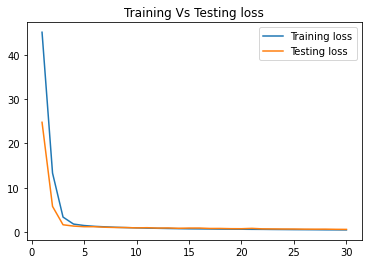

In [ ]:
plt.plot(res['Epochs'],res['loss'],label='Training loss')
plt.plot(res['Epochs'],res['val_loss'],label='Testing loss')
plt.title('Training Vs Testing loss')
plt.legend()
plt.show()

In [ ]:
y_pred=mod.predict(x_test)

In [ ]:
y_pred

array([[ 0.18024045],
       [-0.26848406],
       [-0.3697397 ],
       [-0.19559354],
       [-0.33187026],
       [-0.03971881],
       [-0.48774093],
       [ 0.09429198],
       [ 1.0445826 ],
       [-0.31238884],
       [-0.17295998],
       [-0.4981622 ],
       [ 0.2164486 ],
       [-0.29249567],
       [ 0.09164505],
       [-0.26884526],
       [-0.16559714],
       [ 0.77599007],
       [-0.32336944],
       [-0.23135155],
       [ 0.18115884],
       [-0.35277313],
       [-0.291084  ],
       [ 0.07458764],
       [ 0.15458232],
       [-0.49833363],
       [-0.5125181 ],
       [ 0.8848632 ],
       [-0.30903834],
       [ 0.21404725],
       [-0.4968874 ],
       [-0.43245476],
       [ 0.4424408 ],
       [-0.06147642],
       [ 0.07714539],
       [ 0.00621062],
       [-0.35679072],
       [-0.59951895],
       [ 0.3044284 ],
       [-0.28160352],
       [ 0.8629425 ],
       [-0.3738944 ],
       [ 0.8896864 ],
       [ 0.5848556 ],
       [-0.2041108 ],
       [-0